In [1]:
# INTRODUCTION
# This notebook addresses stress level detection regarding body humidity, body temperature, and the number of steps.

In [11]:
#Import Packages and Data

# Ignore warnings
import warnings
warnings.simplefilter("ignore")

# Frequently using packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Useful data handling package
! pip install dfply -q
from dfply import *

# Data Analyses
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [12]:
# Import Packages and Data
df_stress = pd.read_csv('Stress-Lysis.csv')

In [15]:
df_stress.head(10)

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0
5,11.31,80.31,40,0
6,18.16,87.16,88,1
7,28.20,97.20,162,2
8,14.25,83.25,61,0
9,26.13,95.13,168,2


In [16]:
len(df_stress)

2001

In [17]:
df_stress = df_stress.rename(columns = {'Step count': 'Step_count', 'Stress Level': 'Stress_Level'})
df_stress.head(1)

,Humidity,Temperature,Step_count,Stress_Level
0,21.33,90.33,123,1


In [18]:
# Data Description
# Humidity

df_stress >> group_by(X.Stress_Level) >> mutate(
    Humidity_size = X.Humidity.count(),
    Humidity_min = np.min(X.Humidity),
    Humidity_max = np.max(X.Humidity),
    Humidity_mean = np.mean(X.Humidity),
    Humidity_sd = np.std(X.Humidity),
    Humidity_cil = np.mean(X.Humidity) - 1.96 * np.std(X.Humidity),
    Humidity_cih = np.mean(X.Humidity) + 1.96 * np.std(X.Humidity)
) >> head(1) >> select(
    X.Stress_Level,
    X.Humidity_size, X.Humidity_min, X.Humidity_max,
    X.Humidity_mean, X.Humidity_sd, X.Humidity_cil, X.Humidity_cih
)

,Stress_Level,Humidity_size,Humidity_min,Humidity_max,Humidity_mean,Humidity_sd,Humidity_cil,Humidity_cih
4,0,501,10.00,24.64,12.519960,1.541525,9.498572,15.541348
0,1,791,15.01,30.65,18.969760,2.316635,14.429155,23.510365
2,2,709,22.91,30.00,26.454457,2.051194,22.434116,30.474798


In [19]:
# Temperature
df_stress >> group_by(X.Stress_Level) >> mutate(
    Temperature_size = X.Temperature.count(),
    Temperature_min = np.min(X.Temperature),
    Temperature_max = np.max(X.Temperature),
    Temperature_mean = np.mean(X.Temperature),
    Temperature_sd = np.std(X.Temperature),
    Temperature_cil = np.mean(X.Temperature) - 1.96 * np.std(X.Temperature),
    Temperature_cih = np.mean(X.Temperature) + 1.96 * np.std(X.Temperature)
) >> head(1) >> select(
    X.Stress_Level,
    X.Temperature_size, X.Temperature_min, X.Temperature_max,
    X.Temperature_mean, X.Temperature_sd, X.Temperature_cil, X.Temperature_cih
)

,Stress_Level,Temperature_size,Temperature_min,Temperature_max,Temperature_mean,Temperature_sd,Temperature_cil,Temperature_cih
4,0,501,79.00,87.64,81.507984,1.468915,78.628911,84.387057
0,1,791,84.01,95.60,87.964665,2.295222,83.466029,92.463301
2,2,709,74.50,99.00,95.422722,2.195980,91.118601,99.726844


In [20]:
# Step count
df_stress >> group_by(X.Stress_Level) >> mutate(
    Stepcount_size = X.Step_count.count(),
    Stepcount_min = np.min(X.Step_count),
    Stepcount_max = np.max(X.Step_count),
    Stepcount_mean = np.mean(X.Step_count),
    Stepcount_sd = np.std(X.Step_count),
    Stepcount_cil = np.mean(X.Step_count) - 1.96 * np.std(X.Step_count),
    Stepcount_cih = np.mean(X.Step_count) + 1.96 * np.std(X.Step_count)
) >> head(1) >> select(
    X.Stress_Level,
    X.Stepcount_size, X.Stepcount_min, X.Stepcount_max,
    X.Stepcount_mean, X.Stepcount_sd, X.Stepcount_cil, X.Stepcount_cih
)

,Stress_Level,Stepcount_size,Stepcount_min,Stepcount_max,Stepcount_mean,Stepcount_sd,Stepcount_cil,Stepcount_cih
4,0,501,0,90,42.964072,26.143064,-8.276333,94.204477
0,1,791,0,184,78.264223,37.817075,4.142755,152.385690
2,2,709,67,200,164.889986,20.806972,124.108321,205.671650


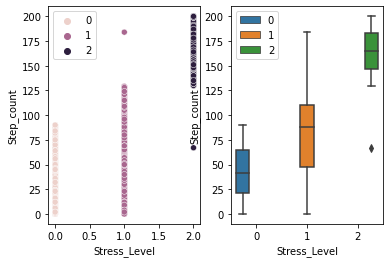

In [21]:
# Scatter Plot and Boxplot
fig, axs = plt.subplots(ncols=2)
sns.scatterplot(data=df_stress,
                x="Stress_Level", y="Step_count", hue=df_stress.Stress_Level.tolist(),
                ax=axs[0])
sns.boxplot(data=df_stress,
            x="Stress_Level", y="Step_count", hue=df_stress.Stress_Level.tolist(),
            ax=axs[1])
plt.show()

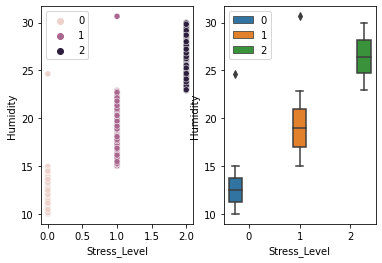

In [22]:
fig, axs = plt.subplots(ncols=2)
sns.scatterplot(data=df_stress,
                x="Stress_Level", y="Humidity", hue=df_stress.Stress_Level.tolist(),
                ax=axs[0])
sns.boxplot(data=df_stress,
            x="Stress_Level", y="Humidity", hue=df_stress.Stress_Level.tolist(),
            ax=axs[1])
plt.show()

In [23]:
# Analyses
# Data Preparation
df_y = df_stress['Stress_Level']
df_x = df_stress[df_stress.columns[df_stress.columns != 'Stress_Level']]
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, random_state=42)

In [24]:
train_x.count

<bound method DataFrame.count of       Humidity  Temperature  Step_count
548      15.68        84.68          22
937      23.37        92.37         176
845      15.17        84.17          62
1608     19.88        88.88          92
1940     10.50        79.50          50
...        ...          ...         ...
1130     10.73        79.73          73
1294     22.67        91.67         113
860      25.38        94.38         164
1459     22.68        91.68         114
1126     12.92        81.92          19

[1500 rows x 3 columns]>

In [25]:
test_x.count

<bound method DataFrame.count of       Humidity  Temperature  Step_count
1394     11.57        80.57          66
353      21.63        90.63         115
1334     16.12        85.12          66
906      15.32        84.32          77
1290     11.65        80.65          74
...        ...          ...         ...
1357     12.47        81.47          65
408      28.63        97.63         134
1615     28.74        97.74         145
694      14.68        83.68          13
1649     27.28        96.28         141

[501 rows x 3 columns]>

In [35]:
# Decision Tree
# Build a learning model
model_dt = tree.DecisionTreeClassifier(max_depth=3, random_state=42)

# Set the test data for learning
model_dt.fit(train_x, train_y)

# Conduct inference
test_dt = model_dt.predict(test_x)

# Calculate the accuracy
score_dt = model_dt.score(test_x, test_y)
print(f'Accuracy is {score_dt *100}%.')

Accuracy is 99.8003992015968%.


[Text(0.5, 0.8333333333333334, 'Humidity <= 22.905\ngini = 0.655\nsamples = 1500\nvalue = [373, 601, 526]\nclass = y[1]'),
 Text(0.25, 0.5, 'Temperature <= 84.005\ngini = 0.473\nsamples = 973\nvalue = [373, 600, 0]\nclass = y[1]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 373\nvalue = [373, 0, 0]\nclass = y[0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 600\nvalue = [0, 600, 0]\nclass = y[1]'),
 Text(0.75, 0.5, 'Humidity <= 30.325\ngini = 0.004\nsamples = 527\nvalue = [0, 1, 526]\nclass = y[2]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 526\nvalue = [0, 0, 526]\nclass = y[2]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = y[1]')]

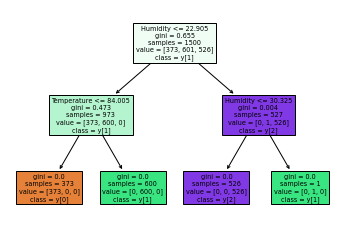

In [30]:
plot_tree(model_dt, feature_names=train_x.columns, class_names=True, filled=True)

In [36]:
#  Random Forest
# Classification
# Build a leaening model
model_rf = RandomForestClassifier(max_depth=3, random_state=42)

# Set the test data for learning
model_rf.fit(train_x, train_y)

# Conduct inference
test = model_rf.predict(test_x)

# Calculate the accuracy
score_rfc = accuracy_score(test_y, test)
print(f'Accuracy is {score_rfc * 84}%.')

Accuracy is 83.83233532934132%.


In [33]:
# Regression
score_reg = model_rf.score(test_x, test_y)
print(f'Accuracy is {score_reg * 100}%.')

Accuracy is 99.8003992015968%.


In [37]:
# RMSE and R2 Evaluation
# Predict train_x
train_y_pred = model_rf.predict(train_x)

# Predict test_y
test_y_pred = model_rf.predict(test_x)

# RMSE
print('RMSE Train: %.2f, Test: %.2f' % (
        mean_squared_error(train_y, train_y_pred, squared=False), # Train
        mean_squared_error(test_y, test_y_pred, squared=False)    # test
      ))

# R2
print('R^2 Train: %.2f, Test: %.2f' % (
        r2_score(train_y, train_y_pred), # Train
        r2_score(test_y, test_y_pred)    # Test
      ))

RMSE Train: 0.03, Test: 0.04
R^2 Train: 1.00, Test: 1.00


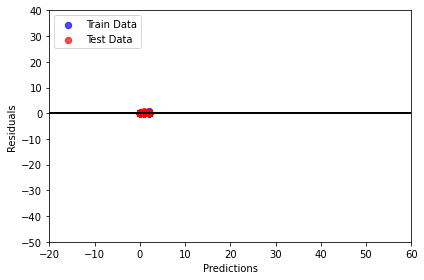

In [38]:
# Residual Plot Evaluation
# Plot predictions and residuals in train data
plt.scatter(train_y_pred,
            train_y_pred - train_y,
            c='blue',
            marker='o',
            s=40,
            alpha=0.7,
            label='Train Data')


# Plot predictions and residuals in test data
plt.scatter(test_y_pred,
            test_y_pred - test_y,
            c='red',
            marker='o',
            s=40,
            alpha=0.7,
            label='Test Data')

# Configurate Style
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-20, xmax=60, lw=2, color='black')
plt.xlim([-20, 60])
plt.ylim([-50, 40])
plt.tight_layout()
plt.show()


In [ ]:
# Discussion

#  Decision Tree and Random Forest¶
# Taking into account accuracy scores, RMSE, R2, and a residual-plot, the both models seem to classify stress levels accurately. However, respective outputs imply that Stress-Lysis data might be inadequate to clasiffication as the box-plots have already shown.

In [ ]:
 # GConclusion
# GGWhile classification methods such as desicion tree and random forest are frequently used, the findings of this notebook show that moderately classified data might be unsuitable for scrutinizing insightful suggestions.

In [ ]:
# Conclusion
# While classification methods such as desicion tree and random forest are frequently used, the findings of this notebook show that moderately classified data might be unsuitable for scrutinizing insightful suggestions.